# Regression Notebook with PyGRN

In [1]:
from pygrn import grns, problems, evolution, config
import argparse
import os
import numpy as np
import matplotlib.pyplot as plt
from loguru import logger



# Creation of the Regression problem
def f(t, f: float = 1, k: int = 3):
    """ Fourrier decomposition of a square signal

    Args:
        t (float): time
        f(float, optional): frequency. Defaults to 1. 
        k (int, optional): degree of decomposition. Defaults to 2.

    Returns:
        values
    """
    y = np.zeros(t.shape[0])
    for i in range(0, k):

        y += np.sin((2*i + 1) * 2*np.pi*f*t)/(2*i + 1)
    
    
    y /= (4/np.pi)
    
    # transform values between 0 and 1
    y = (y - np.min(y)) / (np.max(y) - np.min(y))
    
    return y

def f_lin(t):

    return t

class Regression(problems.base.Problem):
    def __init__(self, x_train, y_train):
        super().__init__("regression")
        self.namestr = "regression"
        self.nin = 1
        self.nout = 1
        self.cacheable = True

        self.x_train = x_train
        self.y_train = y_train

        
    def eval(self, grn):

        grn.setup()
        grn.warmup(25)
        fit = 0.0
        for i in range(max(self.x_train.shape)):
            grn.set_input(self.x_train[i])
            grn.step()
            fit += np.linalg.norm(grn.get_output().item() - self.y_train[i]).item()

        return 1-fit


2025-07-23 16:52:30.963 | INFO     | pygrn.evolution.evolution:report:80 - Generation 0: best fit -147.73677501067192, fit mean -297.3302073362224, fit std 199.47778207052815
2025-07-23 16:52:37.601 | INFO     | pygrn.evolution.evolution:report:80 - Generation 1: best fit -144.6431249760316, fit mean -300.9234196163059, fit std 233.24481961646467
2025-07-23 16:52:49.105 | INFO     | pygrn.evolution.evolution:report:80 - Generation 2: best fit -144.6431249760316, fit mean -240.99917909499447, fit std 151.91522951041318
2025-07-23 16:52:56.614 | INFO     | pygrn.evolution.evolution:report:80 - Generation 3: best fit -81.77729548123679, fit mean -281.60454216897176, fit std 233.78647227187258
2025-07-23 16:53:05.385 | INFO     | pygrn.evolution.evolution:report:80 - Generation 4: best fit -81.77729548123679, fit mean -242.06332553941243, fit std 179.6110853714175
2025-07-23 16:53:13.190 | INFO     | pygrn.evolution.evolution:report:80 - Generation 5: best fit -81.77729548123679, fit mean 

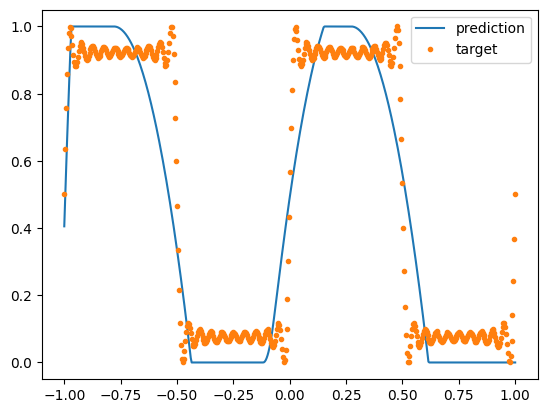

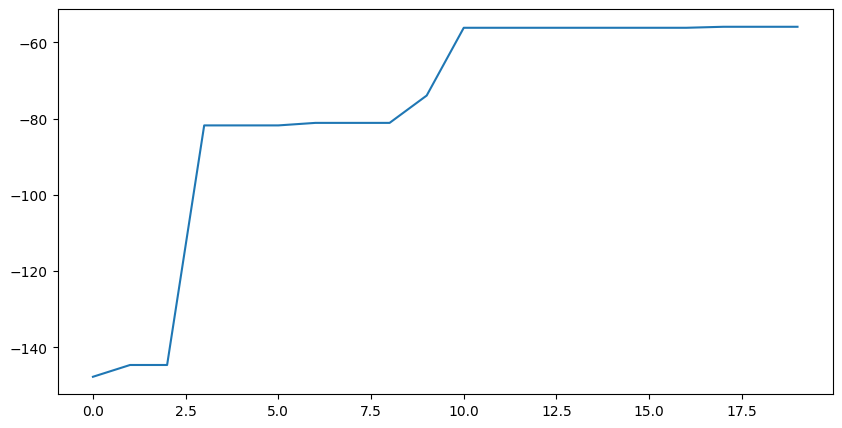

In [4]:
t = np.linspace(-1, 1, 500)
y = f(t, f=1, k=10)
    
# logger.remove()
logger.level("INFO")
grn = lambda : grns.DissetGRN()
problem = Regression(t, y)


grneat = evolution.Evolution(problem, grn, num_workers=10)
best_fit, best_ind = grneat.run(20)

best_fit_history = grneat.best_fit_history
logger.info("best fit: ", best_fit)
# problem.eval(grneat.best_grn)
    
# y_eval = f(t_eval)
best_grn = best_ind.grn

best_grn.setup()
best_grn.warmup(25)
y_eval = []
for i in range(max(t.shape)):
    best_grn.set_input(t[i])
    best_grn.step()
    y_eval.append(best_grn.get_output().item())


plt.plot(t, y_eval, label="prediction")
plt.plot(t, y, '.', label="target")

plt.legend()
plt.figure(figsize=(10, 5))
plt.plot(best_fit_history)
plt.show()

delta =  0.054807707440597986
belta =  1.9565924736274056
[0.         0.27626952 0.43522946 0.28850102]
[0.01010101 0.27393046 0.43941022 0.28665932]
[0.02020202 0.2715588  0.44365152 0.28478968]
[0.03030303 0.26915447 0.44795353 0.28289201]
[0.04040404 0.26671736 0.45231642 0.28096622]
[0.05050505 0.2642474  0.45674036 0.27901224]
[0.06060606 0.2617445  0.46122551 0.27702998]
[0.07070707 0.25920858 0.46577205 0.27501937]
[0.08080808 0.25663956 0.47038012 0.27298032]
[0.09090909 0.25403736 0.47504988 0.27091276]
[0.1010101  0.25140189 0.47978148 0.26881662]
[0.11111111 0.2487331  0.48457508 0.26669182]
[0.12121212 0.24603091 0.48943081 0.26453829]
[0.13131313 0.24329523 0.49434881 0.26235596]
[0.14141414 0.24052602 0.49932922 0.26014476]
[0.15151515 0.2377232  0.50437218 0.25790462]
[0.16161616 0.23488671 0.50947781 0.25563549]
[0.17171717 0.23201648 0.51464623 0.25333729]
[0.18181818 0.22911247 0.51987757 0.25100996]
[0.19191919 0.2261746  0.52517194 0.24865346]
[0.2020202  0.22320284

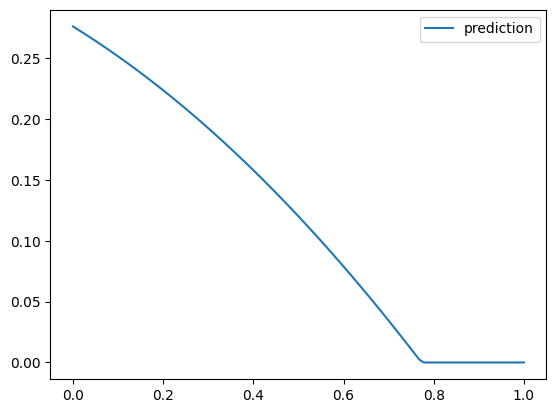

<Figure size 1000x500 with 0 Axes>

In [5]:
# test a random genome 
from pygrn import grns, problems, evolution, config
import argparse
import os
import numpy as np
import matplotlib.pyplot as plt
from loguru import logger



grn = grns.ClassicGRN()
grn.random(1, 1, 2)
t = np.linspace(0, 1, 100)

print("delta = ", grn.delta)
print("belta = ", grn.beta)
grn.setup()
grn.warmup(25)
y_eval = []
for i in range(max(t.shape)):
    grn.set_input(t[i])
    grn.step()

    print(grn.concentration)
    y_eval.append(grn.get_output().item())

plt.plot(t, y_eval, label="prediction")
# plt.plot(t, y, label="target")

plt.legend()
plt.figure(figsize=(10, 5))
# plt.plot(best_fit_history)
plt.show()

# Double the frequence of a sinus
- see [1] for explanantion 

2025-08-19 13:17:23.193 | INFO     | pygrn.evolution.evolution:report:80 - Generation 0: best fit -157.08347821218712, fit mean -278.35224793118897, fit std 202.34353486071262
2025-08-19 13:17:31.278 | INFO     | pygrn.evolution.evolution:report:80 - Generation 1: best fit -155.72405564718466, fit mean -285.3245296251384, fit std 215.23815796716354
2025-08-19 13:17:38.408 | INFO     | pygrn.evolution.evolution:report:80 - Generation 2: best fit -155.72405564718466, fit mean -263.2276121799071, fit std 208.59909224069406
2025-08-19 13:17:47.984 | INFO     | pygrn.evolution.evolution:report:80 - Generation 3: best fit -153.1127025434768, fit mean -233.8930069370608, fit std 161.4748415021802
2025-08-19 13:18:12.296 | INFO     | pygrn.evolution.evolution:report:80 - Generation 4: best fit -153.4794694253159, fit mean -204.89230673429253, fit std 100.66492822088361
2025-08-19 13:18:30.962 | INFO     | pygrn.evolution.evolution:report:80 - Generation 5: best fit -153.22169422977743, fit mea

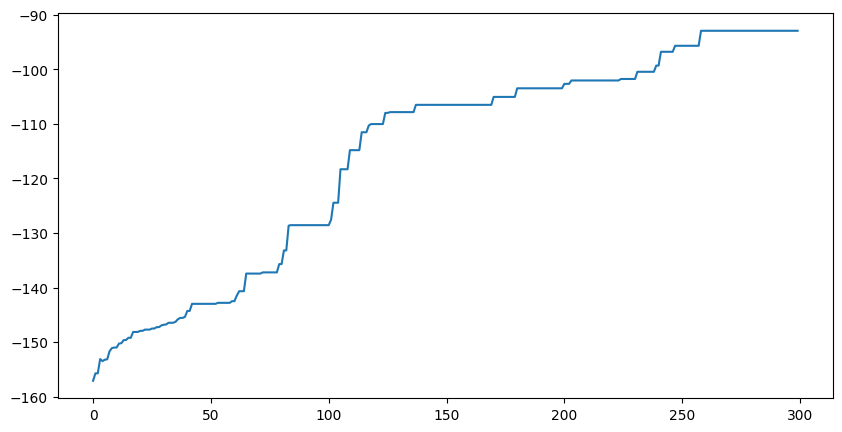

In [28]:
import numpy as np
from pygrn import grns, problems, evolution, config
from pygrn.problems import double
import argparse
import os
import numpy as np
import matplotlib.pyplot as plt
from loguru import logger

class DoubleFreq(problems.base.Problem):


    def __init__(self, namestr="double_frequence", period = 0.1 ): 

        super().__init__(namestr)
        self.nin = 1
        self.nout = 1
        self.cacheable = True

        self.T = period

        t = np.linspace(-5, 5, 500)
        self.x_train = 0.5*np.sin(2*np.pi*t/self.T) + 0.5
        self.y_train = 0.5*np.sin(2*np.pi*t/(self.T/2)) + 0.5

    # numba.jit
    def eval(self, grn):
        grn.setup()
        grn.warmup(25)
        fit = 0.0
        for i in range(max(self.x_train.shape)):
            grn.set_input(self.x_train[i])
            grn.step()
            fit += np.linalg.norm(grn.get_output().item() - self.y_train[i]).item()


        return 1-fit

period = 0.1
grn = lambda : grns.ClassicGRN()

# problem = double.DoubleFrequency()
problem = DoubleFreq(period=period)

grneat = evolution.Evolution(problem, grn, num_workers=30)

best_fit, best_ind = grneat.run(300)

best_fit_history = grneat.best_fit_history
logger.info("best fit: ", best_fit)

plt.figure(figsize=(10, 5))
plt.plot(best_fit_history)
plt.show()



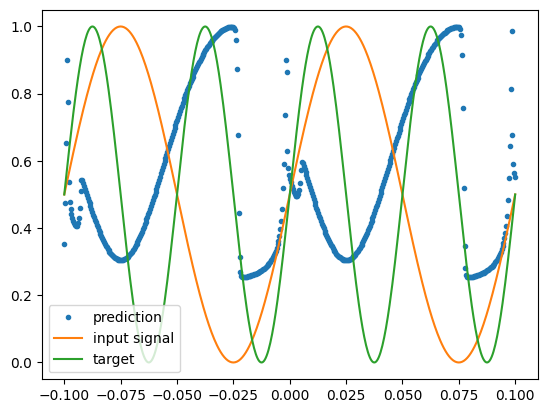

In [30]:
# eval grn
period = 0.1
t = np.linspace(-0.1, 0.1, 500)
input_sig = 0.5*np.sin(2*np.pi*t/period) + 0.5
true_out = 0.5*np.sin(2*np.pi*t/(period/2)) + 0.5
best_grn = best_ind.grn

best_grn.setup()
best_grn.warmup(25)
y_eval = []
for i in range(max(t.shape)):
    best_grn.set_input(input_sig[i])
    best_grn.step()
    y_eval.append(best_grn.get_output().item())

plt.Figure(figsize=(50, 50))
plt.plot(t, y_eval, '.', label="prediction")
plt.plot(t, input_sig, '-', label="input signal")
plt.plot(t, true_out, '-', label="target")
plt.legend()

In [11]:
np.linalg.norm(y_eval - input_sig)

np.float64(1.4684325335744015)

# REINFORCEMENT WITH GRN 

In [ ]:
import gymnasium as gym
from gymnasium import wrappers
from pygrn import grns, problems, evolution, config
import numpy as np
from loguru import logger   


class RLCorrector(problems.base.Problem):

    def __init__(self, env_name="Pendulum-v1"): 

        namestr = env_name
        super().__init__(namestr)

        # self.train_env = wrappers.NormalizeObservation(gym.make(env_name))
        self.vis_env = gym.make(env_name, render_mode="human")
        
        action_space = self.vis_env.action_space
        observation_space = self.vis_env.observation_space
        self.has_continuous_action = isinstance(action_space, gym.spaces.Box)
        self.has_continuous_observation = isinstance(observation_space, gym.spaces.Box)
        self.nin = self.vis_env.observation_space.shape[0]

        self.dtype = float


        if self.has_continuous_observation:
            self.nin = self.vis_env.observation_space.shape[0]
            self.h_obs = self.vis_env.observation_space.high
            self.l_obs = self.vis_env.observation_space.low
            self.dtype = float


        if self.has_continuous_action:
            self.nout = self.vis_env.action_space.shape[0]
            self.h_act = self.vis_env.action_space.high
            self.l_act = self.vis_env.action_space.low
            self.dtype = int

        else:
            self.nout = 1
            self.n = self.vis_env.action_space.n
        
        self.cacheable = True


    def eval(self, grn, render = False):
        
        n_eval_episode = 3

        fit = 0
        reward = 0
        ts = 0
        seed = np.random.randint(0, 5)

        while len(envs) < 1:
            pass
        eval_env = envs.pop()

        for i in range(n_eval_episode):
            grn.setup()
            grn.warmup(25)
            seed = np.random.randint(0, 5)
            obs, _ = eval_env.reset(seed=seed)
            done = False

            while True:


                # if self.has_continuous_observation:
                #     (obs - self.l_obs) / (self.h_obs - self.l_obs)  # map action to [0, 1]
                grn.set_input(obs)
                grn.step()
                # print("grn best output ", grn.get_output().item())
                if self.has_continuous_action:
                    action = grn.get_output() * (self.h_act - self.l_act) + self.l_act
                else:
                    action = int(grn.get_output()[0] * (self.n - 1))

                # print("action ", action)s
                # print(action)
                # action = 1 if grn.get_output().item() > 0.5 else 0
                obs, r, terminated, truncated, info = eval_env.step(action)
            
                if terminated or truncated:
                    done = True
                    break
                reward += r
                ts += 1
  
            fit = reward / n_eval_episode

            # if fit ==0:
                # logger.debug(f"fit = {fit} ")

        envs.append(eval_env)
        # print("reward = ", reward, "\t steps = ", ts)
        return fit 
    
    def visualize_grn(self, grn, ntry = 1):
    

        fit = 0
        reward = 0
        ts = 0
        grn.setup()
        grn.warmup(25)

        for t in range(ntry):
            obs, _ = self.vis_env.reset(seed=t)
            done = False

            actions = []
            while True:


                # if self.has_continuous_observation:
                #     obs = (obs - self.l_obs) / (self.h_obs - self.l_obs)  # map action to [0, 1]
                grn.set_input(obs)
                grn.step()
                # print("grn best output ", grn.get_output().item())
                if self.has_continuous_action:
                    action = grn.get_output() * (self.h_act - self.l_act) + self.l_act
                else:
                    action = np.round(grn.get_output() * (self.n - 1)).item()
                
                actions.append(action)
                # action = 1 if grn.get_output().item() > 0.5 else 0
                obs, r, terminated, truncated, info = self.vis_env.step(action)
                
                if terminated or truncated:
                    if truncated:
                        logger.debug(f"truncated")
                    done = True
                    break
                reward += r
                ts += 1


            fit += reward


        # if fit == 0:
        # logger.debug(f"fit = {fit} , nsteps = {ts}")
        # self.eval_env.close()
        # print("reward = ", reward, "\t steps = ", ts)
        return fit/ntry
    


env_name = 'InvertedDoublePendulum-v5'
num_workers = 30
global envs
envs = [ gym.make(env_name) for _ in range(num_workers)]



problem = RLCorrector(env_name)

In [ ]:
# evolve grn
n_gens = 500
grn = lambda : grns.ClassicGRN()

grneat = evolution.Evolution(problem, grn, num_workers=num_workers)
best_fit, best_ind = grneat.run(n_gens)


logger.info(f"best fit: {best_fit}")
logger.info(f"best ind: {best_ind.grn}")

with open(env_name + ".grn", 'w') as f:
    f.write(str(best_ind.grn) + '\n')


2025-07-24 17:36:44.355 | INFO     | pygrn.evolution.evolution:report:80 - Generation 0: best fit 186.05766187808263, fit mean 52.950827491057275, fit std 23.31857726047061
2025-07-24 17:36:49.110 | INFO     | pygrn.evolution.evolution:report:80 - Generation 1: best fit 186.05766187808263, fit mean -24.53785036624227, fit std 288.5725177817905
2025-07-24 17:36:55.219 | INFO     | pygrn.evolution.evolution:report:80 - Generation 2: best fit 167.4391135956511, fit mean 26.82010987543468, fit std 170.45312435834364
2025-07-24 17:37:16.316 | INFO     | pygrn.evolution.evolution:report:80 - Generation 3: best fit 278.425152657917, fit mean 60.66072171339839, fit std 67.16165171394199
2025-07-24 17:37:22.776 | INFO     | pygrn.evolution.evolution:report:80 - Generation 4: best fit 278.425152657917, fit mean 61.18144358516863, fit std 91.12596881891558
2025-07-24 17:37:28.561 | INFO     | pygrn.evolution.evolution:report:80 - Generation 5: best fit 278.425152657917, fit mean 66.83822111584229

In [15]:

fit_eval = problem.eval(best_ind.grn)


fit_viz = problem.visualize_grn(best_ind.grn, ntry=10)

print(fit_viz)


# best_fit

1579.8719990454279


In [6]:
with open("mujuco_double_pendulum.grn", 'w') as f:
    f.write(str(best_ind.grn) + '\n')


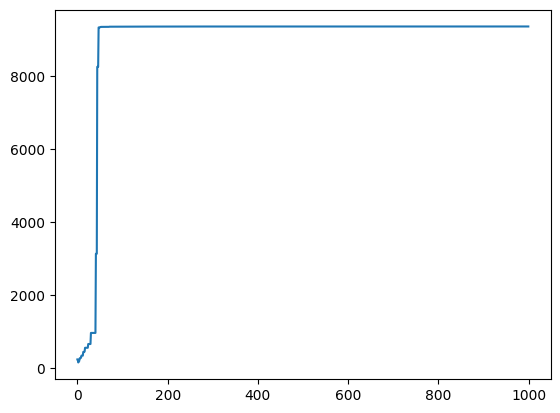

In [5]:
import matplotlib.pyplot as plt


plt.plot(grneat.best_fit_history)

In [4]:
%load_ext autoreload
%autoreload 2
import gymnasium as gym
from pygrn import grns, problems, evolution, config
from pygrn.problems.reinforcement import ReinforcementLearningTask, create_env_info, set_env_pool
import pygrn.config as config


config.read_config("config.yaml")
env_name = "MountainCar-v0"

num_workers = 5

global envs
envs = []
for i in range(num_workers):
    envs.append(gym.make(env_name))

env_info = create_env_info(envs[0])


set_env_pool(envs)
# ENV_POOL = envs
problem = ReinforcementLearningTask(env_info, env_name=env_name)

grn = lambda : grns.ClassicGRN()

grneat = evolution.Evolution(problem, grn, num_workers=num_workers)
best_fit, best_ind = grneat.run(100)

print(f"best fit: {best_fit}")
print(f"best ind: {best_ind.grn}")


2025-08-25 10:09:45.123 | INFO     | pygrn.evolution.evolution:__init__:56 - 
        GRNEAT HYPERPARAMETERS:
        POPULATION_SIZE = 100
        mutation_rate = 0.75
        mutation_add_rate = 0.5
        mutation_del_rate = 0.25
        crossover_rate = 0.25
        crossover_threshold = 0.15
        tournament_size = 3
        tournament_with_replacement = True
        start_regulatory_size = 1
        min_species_size = 5
        start_species_threshold = 0.15
        species_threshold_update = 0.01
        min_species_threshold = 0.03
        max_species_threshold = 0.5
        id_coef = 0.75
        enh_coef = 0.125
        inh_coef = 0.125
        max_selection_tries = 10
        beta_min = 0.05
        beta_max = 2.0
        delta_min = 0.05
        delta_max = 2.0
        


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


2025-08-25 10:09:45.643 | INFO     | pygrn.evolution.evolution:report:119 - Generation 0: best fit -199.0, fit mean -231.04, fit std 156.96330271754604
2025-08-25 10:09:46.153 | INFO     | pygrn.evolution.evolution:report:119 - Generation 1: best fit -199.0, fit mean -215.02, fit std 112.14000000000001
2025-08-25 10:09:46.681 | INFO     | pygrn.evolution.evolution:report:119 - Generation 2: best fit -150.0, fit mean -246.57, fit std 190.4131431913249
2025-08-25 10:09:47.256 | INFO     | pygrn.evolution.evolution:report:119 - Generation 3: best fit -150.0, fit mean -294.63, fit std 260.5206961068545
2025-08-25 10:09:47.876 | INFO     | pygrn.evolution.evolution:report:119 - Generation 4: best fit -150.0, fit mean -222.19, fit std 136.9179093471705
2025-08-25 10:09:48.590 | INFO     | pygrn.evolution.evolution:report:119 - Generation 5: best fit -199.0, fit mean -214.40384615384616, fit std 110.00546483197738
2025-08-25 10:09:49.214 | INFO     | pygrn.evolution.evolution:report:119 - Gen

best fit: -199.0
best ind: {"num_input": 2, "num_output": 1, "num_regulatory": 19, "ids": [0.32769036545598973, 0.5053572030812491, 0.030633987230349824, 0.31995133722610114, 0.7833585451257579, 0.643958459805079, 0.8349050114163495, 0.07882425217591515, 0.02311947350487875, 0.9348053957356769, 0.038769669242304516, 0.03117218755322193, 0.11451930352215178, 0.03641109272398457, 0.03641109272398457, 0.2114374881909007, 0.05118221203110285, 0.5432049893974762, 0.03117218755322193, 0.2654747464218771, 0.3988478249050219, 0.9525716241805964], "enh": [0.5482519698439958, 0.30601772709683794, 0.40959185812283383, 0.2412451349256618, 0.35970586123718407, 0.0788996996600444, 0.24252131735368643, 0.6129102161481879, 0.7052945512301778, 0.6454245532965219, 0.534439461530558, 0.3842218923455679, 0.6857064566255343, 0.6738079017596843, 0.6738079017596843, 0.9275829839267415, 0.43752454557886555, 0.45862268684071195, 0.3842218923455679, 0.4027223338286322, 0.8902124507525547, 0.09875800045613514], 